In [1]:
import os, sys, inspect

current_dir = os.path.dirname(os.path.abspath(os.path.join(inspect.getfile(inspect.currentframe()), os.pardir)))
current_dir = os.path.join(current_dir ,"src")
sys.path.insert(0, current_dir)

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os
import numpy as np
import lines
import img_logger
from os import listdir
from os.path import isfile, join

plt.rcParams['figure.figsize'] = [30, 30]
path_data = ".." +os.sep+ "input"
network_path = os.path.join("config", "frozen_east_text_detection.pb")
pictures = [f for f in listdir(path_data) if isfile(join(path_data, f))]


In [2]:
def draw_fading_lines(my_lines):
    img = np.full((500, 500), 255).astype(np.uint8)
    for i, l in enumerate(my_lines):
        img = img_logger.draw_lines([l], img, (int(255 / len(my_lines) * i), 0, 0))
    return img

## Test get_axes_XY

This example shows extraction of vertical and horizontal lines. It uses an heuristic when more lines are present. 
It's presumed that the left most horizontal line is y axis and down most is x axis.

We have generated 8 lines. 
Two of them are horizontal (angle = pi/2) with distances 100 and 200. The one with 100 left is selected because is left most.
Two of them are vertical (angle = 0) with distances 100 and 200. The one with 200 left is selected because is down most.

[array([100.,   0.]), array([100.        ,   0.52359878]), array([100.        ,   1.04719755]), array([100.        ,   1.57079633]), array([100.       ,   2.0943951]), array([100.        ,   2.61799388]), array([200,   0]), array([200.        ,   1.57079633])]


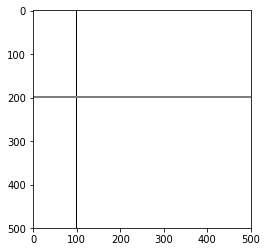

In [16]:
pc = 6
my_lines = [np.array((100, np.pi / pc * i)) for i in range(0, pc)] + [np.array((200,0)) ,np.array((200,np.pi/2)) ]
print(my_lines)
#my_lines = [(400, 0), (400,np.pi/2)] + my_lines
my_lines = lines.get_axes_XY(my_lines, 2)
img = draw_fading_lines(my_lines)
plt.imshow(img, cmap="gray")

## Testing hough lines output

A few lines are generated and printed

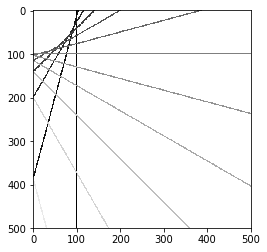

In [17]:

pc = 12
# generate lines
my_lines = [np.array((100, np.pi / pc * i)) for i in range(0, pc)]
img = draw_fading_lines(my_lines)
plt.imshow(img, cmap="gray")


## Filter duplicit lines

Removes duplicit lines according to distance and angle threshold. 

There are two examples

1. generates 12 lines all of them with distance 100 form the centre and with angle step 15 deg. 12 lines are generated and only 6 of them remains after filtering with 20 angle `threshold_angle`
2. real world scenario. We can see 7 lines detected in the first example and only 4 in the second one

lines len 12 vs duplicit lines len 6
original lines


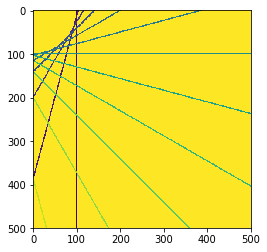

filtered lines


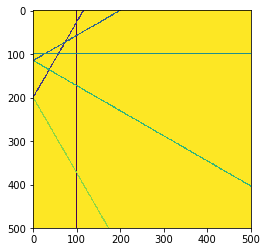

In [18]:
pc = 12
my_lines = [np.array((100, np.pi / pc * i)) for i in range(0, pc)]

threshold_angle = 20

duplicities_removed = lines.filter_duplicit_lines(my_lines,10,threshold_angle)
print("lines len {} vs duplicit lines len {}".format(len(my_lines), len(duplicities_removed)))

print("original lines")
img = draw_fading_lines(my_lines)
plt.imshow(img)
plt.show()

print("filtered lines")
img = draw_fading_lines(duplicities_removed)
plt.imshow(img)
plt.show()

lines lenght:  7


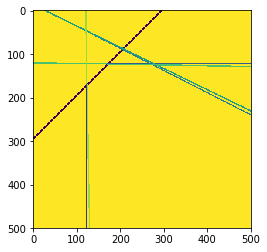

nonduplicit lines lenght:  4


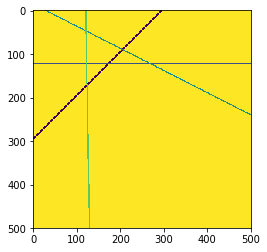

In [19]:

img = cv2.imread(os.path.join(path_data, "tst_1.png "))
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cfg = {"hough_transform_minLineLength": 100,
       "hough_transform_maxLineGap": 10,
       "hough_transform_filter_threshold_distance": 10,
       "hough_transform_filter_threshold_angle": 3
      }

my_lines = lines.get_lines(img.copy(), cfg)
print("lines lenght: ", len(my_lines))
plt.imshow(draw_fading_lines(my_lines))
plt.show()

duplicities_removed =lines.get_non_duplicit_lines(img,cfg)
print("nonduplicit lines lenght: ", len(duplicities_removed))
plt.imshow(draw_fading_lines(duplicities_removed))
plt.show()